In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

# let's keep our keras backend tensorflow quiet
import os
# for testing on GPU
#os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Dense
from keras.utils import np_utils
from keras import backend as K

from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 30, 30

train_data_dir = 'DITS-classification/classification train'
test_data_dir = 'DITS-classification/classification test'
nb_train_samples = 7489
nb_test_samples = 1159
epoche = 30
batch_size = 128
split_per_validazione=0.2

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=split_per_validazione,
    #rotation_range=20,
    #width_shift_range=0.05,
    #height_shift_range=0.05,
    #fill_mode="nearest",
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255.)

In [3]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=int(nb_train_samples*(1-split_per_validazione)),
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=int(nb_train_samples*split_per_validazione),
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=nb_test_samples,
    class_mode="categorical")

X_train = train_generator[0][0]
Y_train = train_generator[0][1]
X_validation = validation_generator[0][0]
Y_validation = validation_generator[0][1]
X_test = test_generator[0][0]
Y_test = test_generator[0][1]

Found 5992 images belonging to 59 classes.
Found 1497 images belonging to 59 classes.
Found 1159 images belonging to 59 classes.


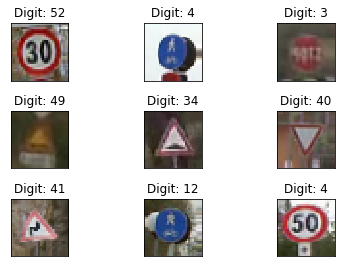

In [4]:
#Stampa di alcuni esempi con le relative digits
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Digit: {}".format(np.where(Y_test[i]==1)[0][0]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [5]:
#Operazioni la stampa finale
y_test = np.empty(len(Y_test),dtype=int)
for j in range(len(Y_test)):
    #print(j, "/", len(Y_test), end='\r')
    y_test[j]=(np.where(Y_test[j]==1)[0][0])

#Quest'ultima cosa serve per la stampa finale
immaginiPerLaStampaFinale=X_test

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]
[ 24  12  48 504 156  36  60  24  24  60  12 192  24  12 336  36 264  12
 264 204 261  24 204  60  72 168  12  48 144  24  60 168  84  48 167 204
 108 251  84  24 372  48  12  12 360  72  36  24  12  24  12  36  48  24
  24  48 188  12 108]


In [6]:
# building a linear stack of layers with the sequential model
def prepare_model():
    model = Sequential()
    model.add(Conv2D(128,kernel_size=(7, 7),activation='relu',input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,kernel_size=(5, 5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(59, activation='relu'))
    model.add(Dense(59, activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

Train on 5991 samples, validate on 1497 samples
Epoch 1/30
 - 15s - loss: 3.5288 - accuracy: 0.1414 - val_loss: 3.0405 - val_accuracy: 0.1870
Epoch 2/30
 - 13s - loss: 2.7982 - accuracy: 0.2717 - val_loss: 2.5170 - val_accuracy: 0.3560
Epoch 3/30
 - 12s - loss: 2.2445 - accuracy: 0.4046 - val_loss: 2.0746 - val_accuracy: 0.4569
Epoch 4/30
 - 12s - loss: 1.8449 - accuracy: 0.4974 - val_loss: 1.8229 - val_accuracy: 0.4876
Epoch 5/30
 - 11s - loss: 1.4809 - accuracy: 0.5819 - val_loss: 1.6199 - val_accuracy: 0.5558
Epoch 6/30
 - 12s - loss: 1.2573 - accuracy: 0.6276 - val_loss: 1.5833 - val_accuracy: 0.5531
Epoch 7/30
 - 13s - loss: 1.0603 - accuracy: 0.6875 - val_loss: 1.3995 - val_accuracy: 0.5792
Epoch 8/30
 - 12s - loss: 0.9054 - accuracy: 0.7301 - val_loss: 1.4774 - val_accuracy: 0.5765
Epoch 9/30
 - 12s - loss: 0.8273 - accuracy: 0.7424 - val_loss: 1.2455 - val_accuracy: 0.6172
Epoch 10/30
 - 12s - loss: 0.6698 - accuracy: 0.7915 - val_loss: 1.2243 - val_accuracy: 0.6386
Epoch 11/30

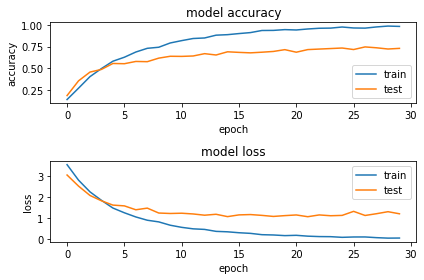

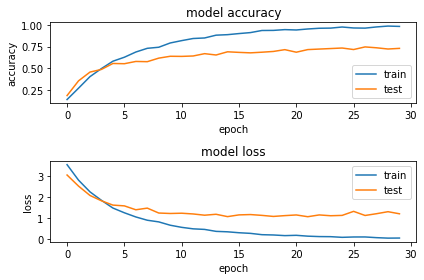

In [7]:
model = prepare_model()
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epoche,
                    verbose=2,
                    validation_data=(X_validation, Y_validation))


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [8]:
save_dir = "results/"
model_name = 'HW5Conv.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/HW5Conv.h5 


In [9]:
modello_cartelli = load_model("results/HW5Conv.h5")
loss_and_metrics = modello_cartelli.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 2.908780539827783
Test Accuracy 0.6376186609268188



739  classified correctly
420  classified incorrectly


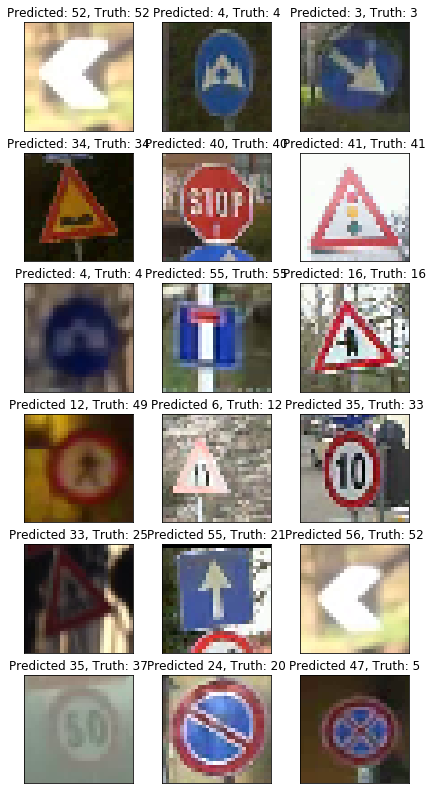

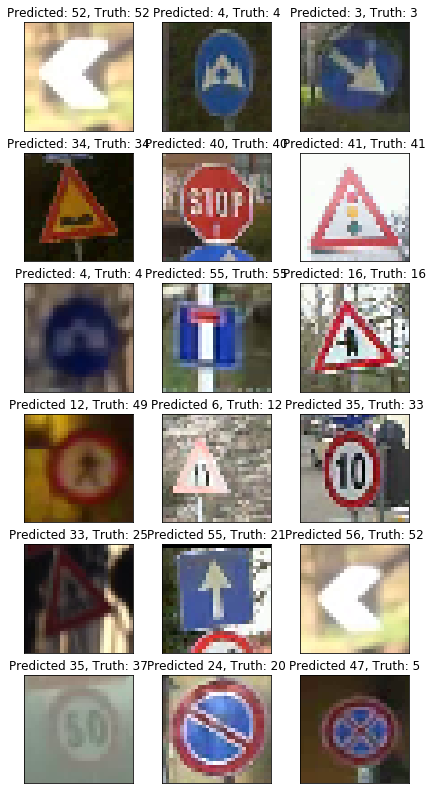

In [10]:
# Creazione delle predizioni sul test set sulla base del modello caricato
carica_model = load_model('results/HW5Conv.h5')
predicted_classes = carica_model.predict_classes(X_test)

# Distinguo cosa è stato predetto bene e cosa no
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# Stampa delle 9 predizioni corrette
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(immaginiPerLaStampaFinale[correct], interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])
    
# Stampa delle 9 predizioni incorrette
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(immaginiPerLaStampaFinale[incorrect], interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation